In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
cars = pd.read_csv('C:\\Users\\gauta\\Desktop\\AI_ML\\ML2\\Advance Regression\\Advanced-Regression-main\\Regularization\\Regularization+Code+++Dataset\\CarPrice_Assignment.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
cars.shape

(205, 26)

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
cars.isnull().sum().sum()

0

In [7]:
cars['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [8]:
cars.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [9]:
for column in cars.columns:
    print(column)

car_ID
symboling
CarName
fueltype
aspiration
doornumber
carbody
drivewheel
enginelocation
wheelbase
carlength
carwidth
carheight
curbweight
enginetype
cylindernumber
enginesize
fuelsystem
boreratio
stroke
compressionratio
horsepower
peakrpm
citympg
highwaympg
price


In [10]:
for column, value in cars.iteritems():
    print(column)

car_ID
symboling
CarName
fueltype
aspiration
doornumber
carbody
drivewheel
enginelocation
wheelbase
carlength
carwidth
carheight
curbweight
enginetype
cylindernumber
enginesize
fuelsystem
boreratio
stroke
compressionratio
horsepower
peakrpm
citympg
highwaympg
price


In [11]:
for column, value in cars.iteritems():
    if value.dtypes == 'object':
        print(column)

CarName
fueltype
aspiration
doornumber
carbody
drivewheel
enginelocation
enginetype
cylindernumber
fuelsystem


In [12]:
cars.select_dtypes(include=object).columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [13]:
cars.select_dtypes(include=object).columns.tolist()

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [14]:
cars.select_dtypes(include=object).columns.value_counts()

CarName           1
fueltype          1
aspiration        1
doornumber        1
carbody           1
drivewheel        1
enginelocation    1
enginetype        1
cylindernumber    1
fuelsystem        1
dtype: int64

In [15]:
for column in cars.select_dtypes(include=object):
#     if cars.columns.dtypes == 'object':
    print(column)

CarName
fueltype
aspiration
doornumber
carbody
drivewheel
enginelocation
enginetype
cylindernumber
fuelsystem


In [16]:
# for i in heart.columns:
#     x = heart[i].value_counts()
#     print("Column name is:",i,"and it value is:",x)

for i in cars.select_dtypes(include=object):
    x = cars[i].value_counts()
    print("Column name is:",i)
    print(x)
    print('----------------------------------------------')

Column name is: CarName
toyota corona                      6
toyota corolla                     6
peugeot 504                        6
subaru dl                          4
mitsubishi mirage g4               3
mazda 626                          3
toyota mark ii                     3
mitsubishi outlander               3
mitsubishi g4                      3
honda civic                        3
volvo 264gl                        2
bmw 320i                           2
isuzu D-Max                        2
audi 100ls                         2
volvo 244dl                        2
porsche cayenne                    2
toyota corolla liftback            2
honda accord                       2
bmw x3                             2
volvo 144ea                        2
volvo 145e (sw)                    2
honda civic cvcc                   2
saab 99le                          2
toyota starlet                     2
saab 99gle                         2
toyota corolla 1200                2
mazda rx-4    

In [17]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [18]:
cars.carlength.describe()

count    205.000000
mean     174.049268
std       12.337289
min      141.100000
25%      166.300000
50%      173.200000
75%      183.100000
max      208.100000
Name: carlength, dtype: float64

In [19]:
# cars.select_dtypes(include=object).columns.tolist()

In [20]:
for i in cars.select_dtypes(include=object):
    print(i)

CarName
fueltype
aspiration
doornumber
carbody
drivewheel
enginelocation
enginetype
cylindernumber
fuelsystem


In [21]:
for i in cars.select_dtypes(include='int64'):
    print(i)

car_ID
symboling
curbweight
enginesize
horsepower
peakrpm
citympg
highwaympg


Column name is: car_ID


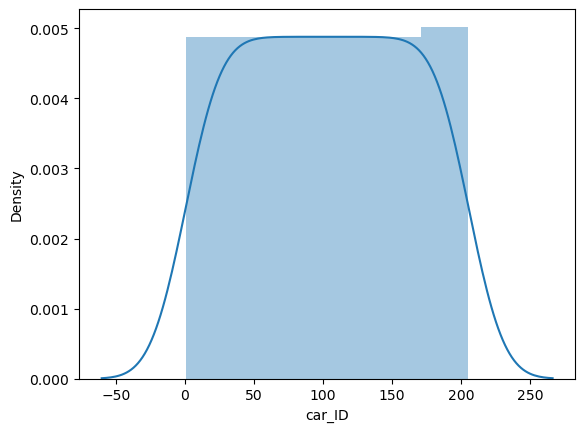

----------------------------------------------
Column name is: symboling


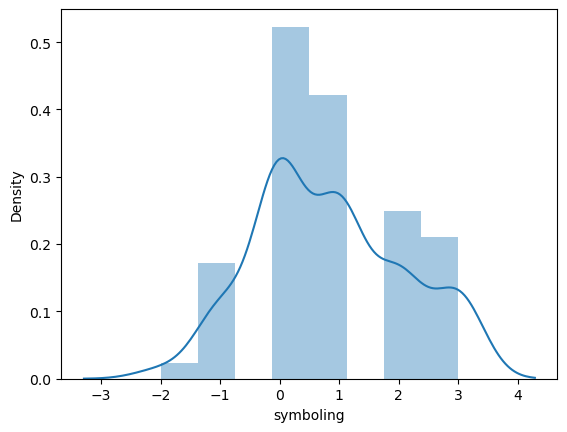

----------------------------------------------
Column name is: curbweight


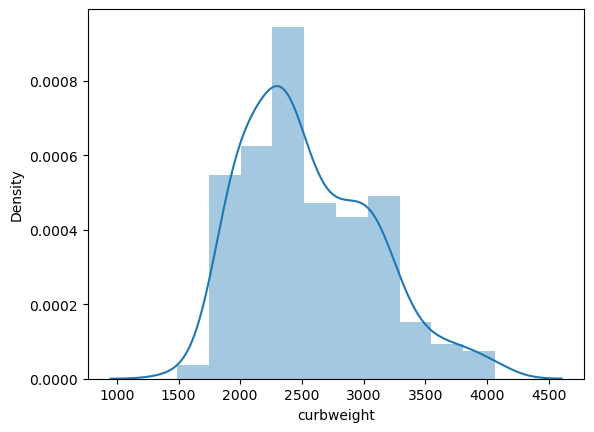

----------------------------------------------
Column name is: enginesize


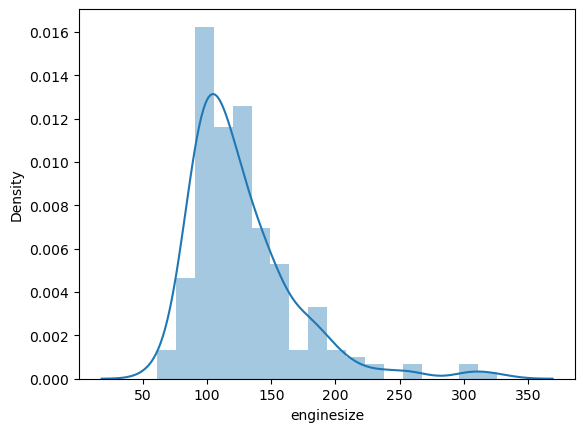

----------------------------------------------
Column name is: horsepower


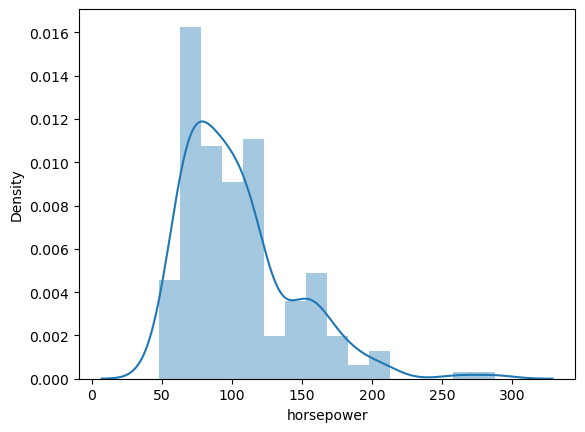

----------------------------------------------
Column name is: peakrpm


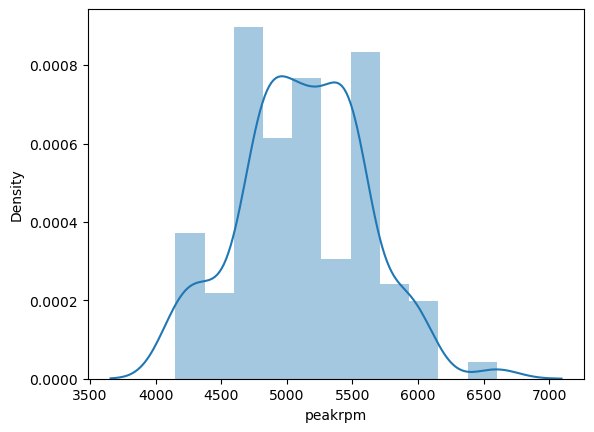

----------------------------------------------
Column name is: citympg


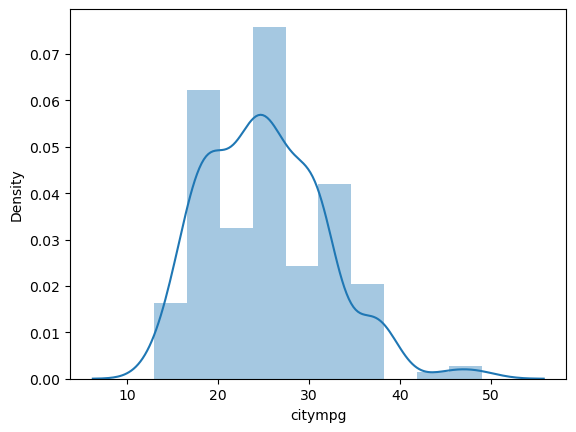

----------------------------------------------
Column name is: highwaympg


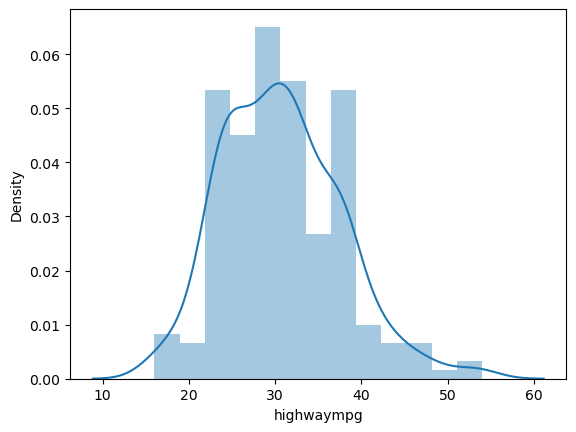

----------------------------------------------


In [22]:
for i in cars.select_dtypes(include='int64'):
    print("Column name is:",i)
    sns.distplot(cars[i])
    plt.show()
    print('----------------------------------------------')

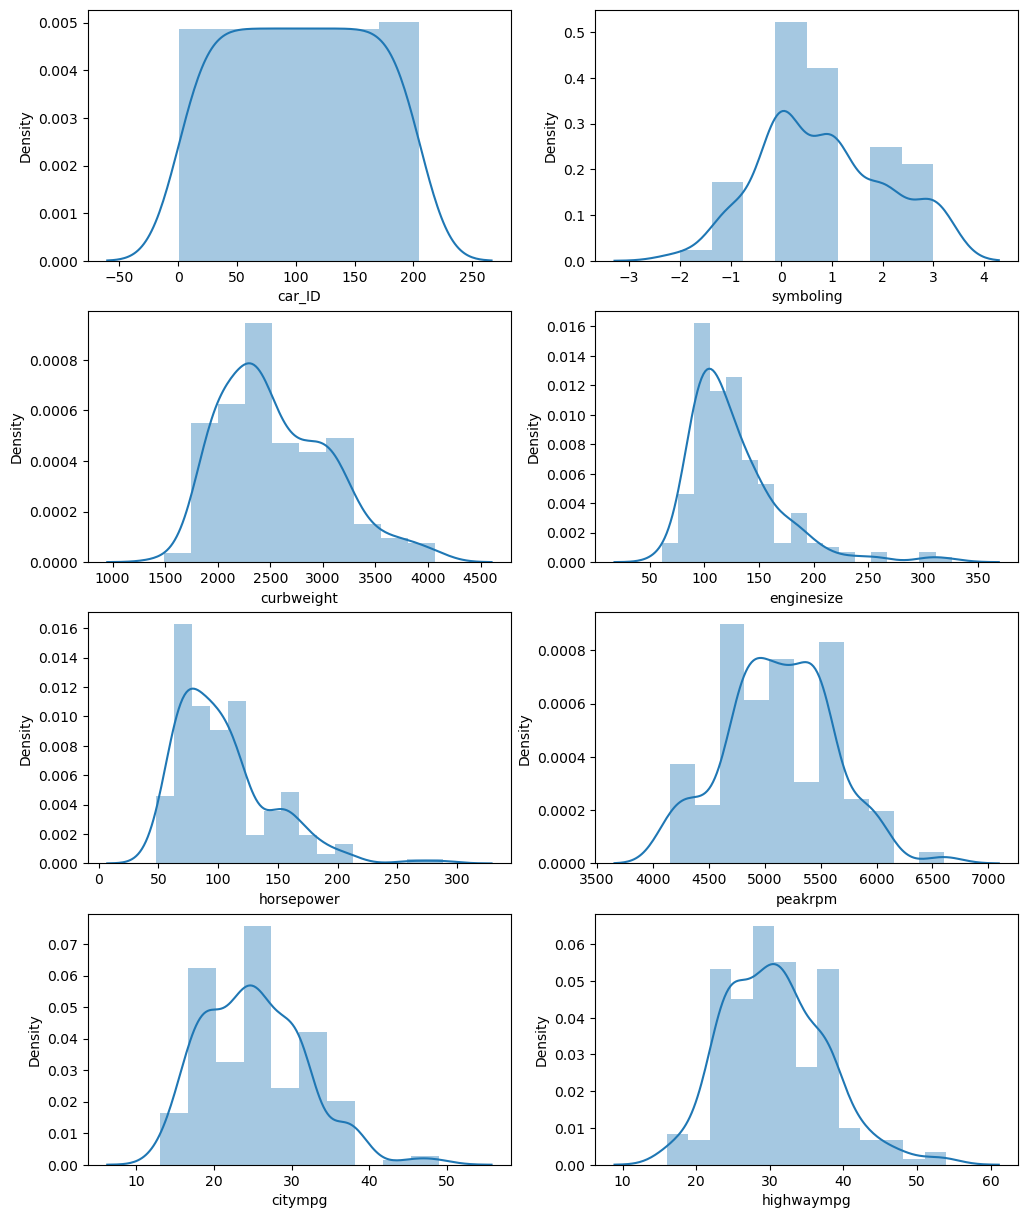

In [23]:
count=1
plt.subplots(figsize=(12, 15))
for i in cars.select_dtypes(include='int64'):
    plt.subplot(4,2,count)
    sns.distplot(cars[i])
    count+=1

plt.show()

In [24]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [25]:
# numeric dataset

cars_numeric = cars.select_dtypes(include=['float64', 'int64'])
cars_numeric.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [26]:
cars_numeric = cars_numeric.drop(['car_ID', 'symboling'], axis = 1)
cars_numeric.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


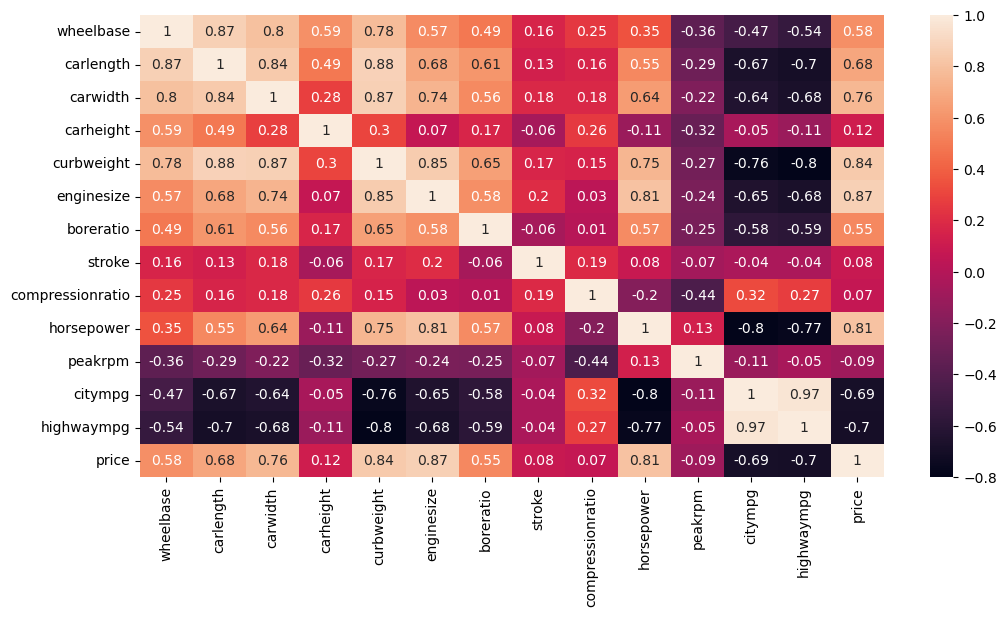

In [27]:
plt.figure(figsize=(12,6))
sns.heatmap(round(cars_numeric.corr(), 2), annot = True)
plt.show()

In [28]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [29]:
cars.CarName.iloc[0]

'alfa-romero giulia'

In [30]:
cars.CarName.iloc[0].split(' ')

['alfa-romero', 'giulia']

In [31]:
cars.CarName.iloc[3].split(' ')

['audi', '100', 'ls']

In [32]:
cars[['Company_Name', 'Model']] = cars['CarName'].str.split(' ', 1, expand = True)
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company_Name,Model
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [33]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company_Name,Model
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [34]:
cars.insert(3, 'Company_Name', cars.pop('Company_Name'))
cars.insert(4, 'Model', cars.pop('Model'))

In [35]:
cars.drop(['CarName'], axis =1, inplace = True)

In [36]:
cars.head()

,car_ID,symboling,Company_Name,Model,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [37]:
cars.Company_Name.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [38]:
cars.Company_Name.nunique()

28

In [39]:
cars['Company_Name'] = cars['Company_Name'].str.lower()

In [40]:
cars.Company_Name.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [41]:
cars.Company_Name.nunique()

27

In [42]:
def replace_name(a,b):
    cars.Company_Name.replace(a,b, inplace=True)

In [43]:
replace_name('maxda', 'mazda')
replace_name('porcshce', 'porsche')
replace_name('toyouta', 'toyota')
replace_name('vokswagen', 'volkswagen')
replace_name('vw', 'volkswagen')

In [44]:
cars.Company_Name.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [45]:
cars.Company_Name.nunique()

22

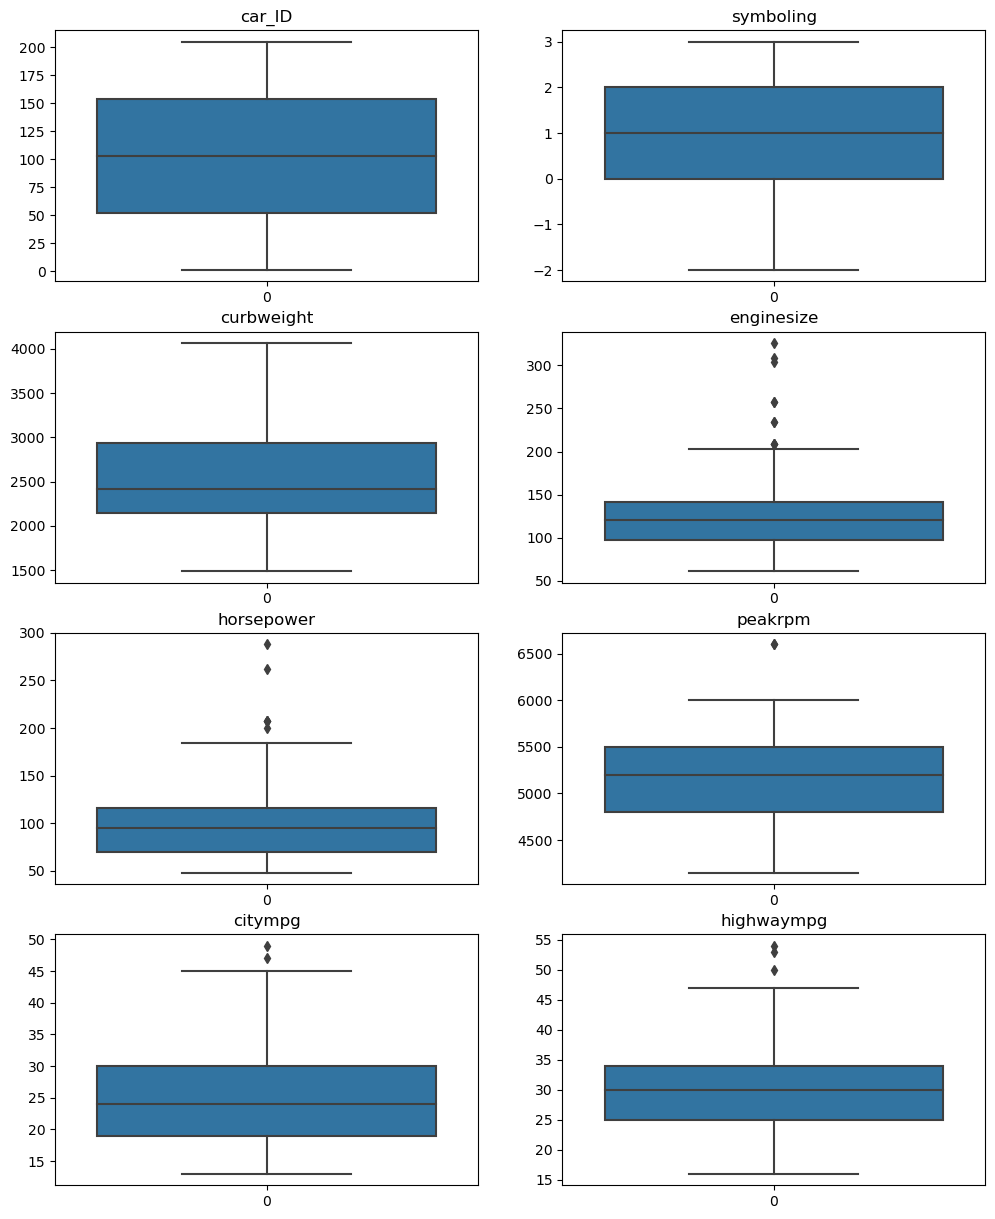

In [46]:
count=1
plt.subplots(figsize=(12, 15))
for i in cars.select_dtypes(include='int64'):
    plt.subplot(4,2,count)
    sns.boxplot(cars[i])
    plt.title(i)
    count+=1

plt.show()

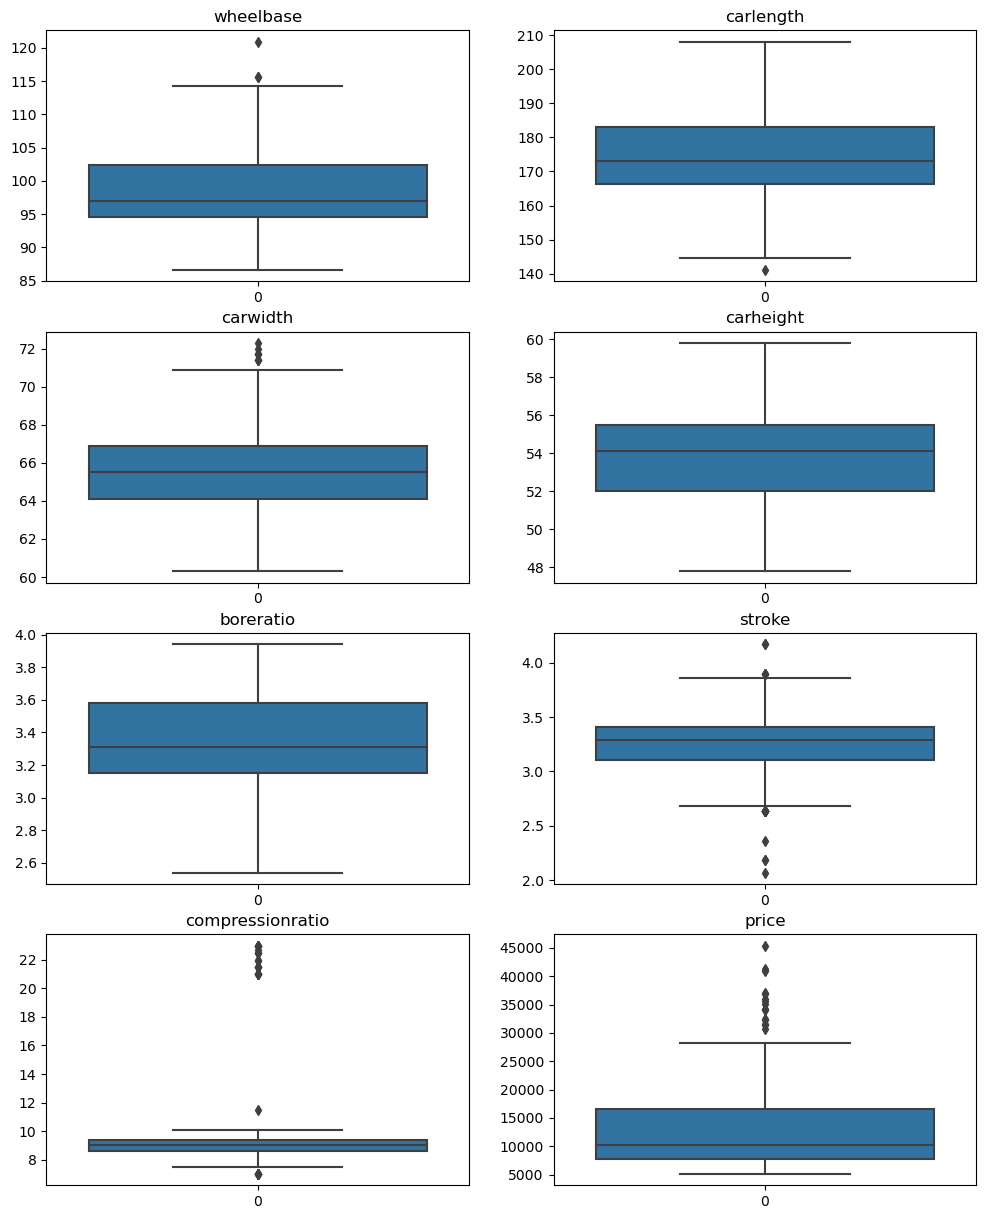

In [47]:
count=1
plt.subplots(figsize=(12, 15))
for i in cars.select_dtypes(include='float64'):
    plt.subplot(4,2,count)
    sns.boxplot(cars[i])
    plt.title(i)
    count+=1

plt.show()

In [48]:
for i in range(5):
    print(10**i)

1
10
100
1000
10000


In [49]:
data = [10**i for i in range(5)]
data

[1, 10, 100, 1000, 10000]

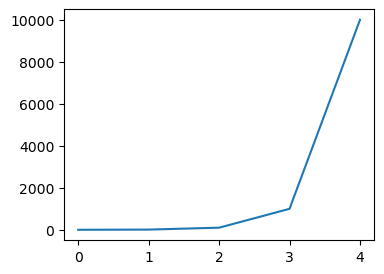

In [50]:
plt.figure(figsize=(4,3))
plt.plot(data)
plt.show()

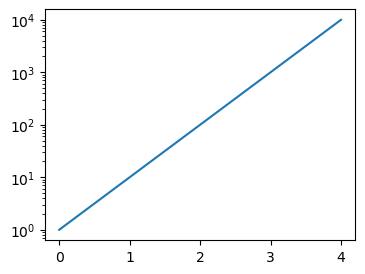

In [51]:
plt.figure(figsize=(4,3))
plt.yscale('log')
plt.plot(data)
plt.show()

In [52]:
# map finction

my_list = [2,3,4,5,6,7,8,9]

In [53]:
def square(x):
    return x*x

In [54]:
list(map(square, my_list))

[4, 9, 16, 25, 36, 49, 64, 81]

In [55]:
result = list(map(lambda x:x**x, my_list))
result

[4, 27, 256, 3125, 46656, 823543, 16777216, 387420489]

In [56]:
np.arange(0, 0.00011, 0.00002)

array([0.e+00, 2.e-05, 4.e-05, 6.e-05, 8.e-05, 1.e-04])

In [57]:
print(format(2.e-05, '.5f'))

0.00002


In [58]:
range_value = np.arange(0, 0.00011, 0.00002)

In [59]:
def num_coversion(x):
    return format(x, '.5f')

In [60]:
print(list(map(num_coversion, range_value)))

['0.00000', '0.00002', '0.00004', '0.00006', '0.00008', '0.00010']


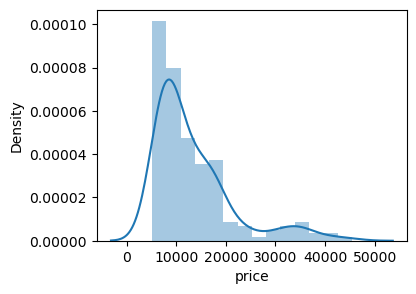

In [61]:
plt.figure(figsize=(4,3))
sns.distplot(cars.price)
plt.show()

In [62]:
cars.price.describe(percentiles=[.25, .50, .75, .85, .95, 1])

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
95%      32472.400000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64

In [63]:
cars.price.median()

10295.0

In [64]:
cars.price.skew()

1.7776781560914454

In [65]:
cars.head()

,car_ID,symboling,Company_Name,Model,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


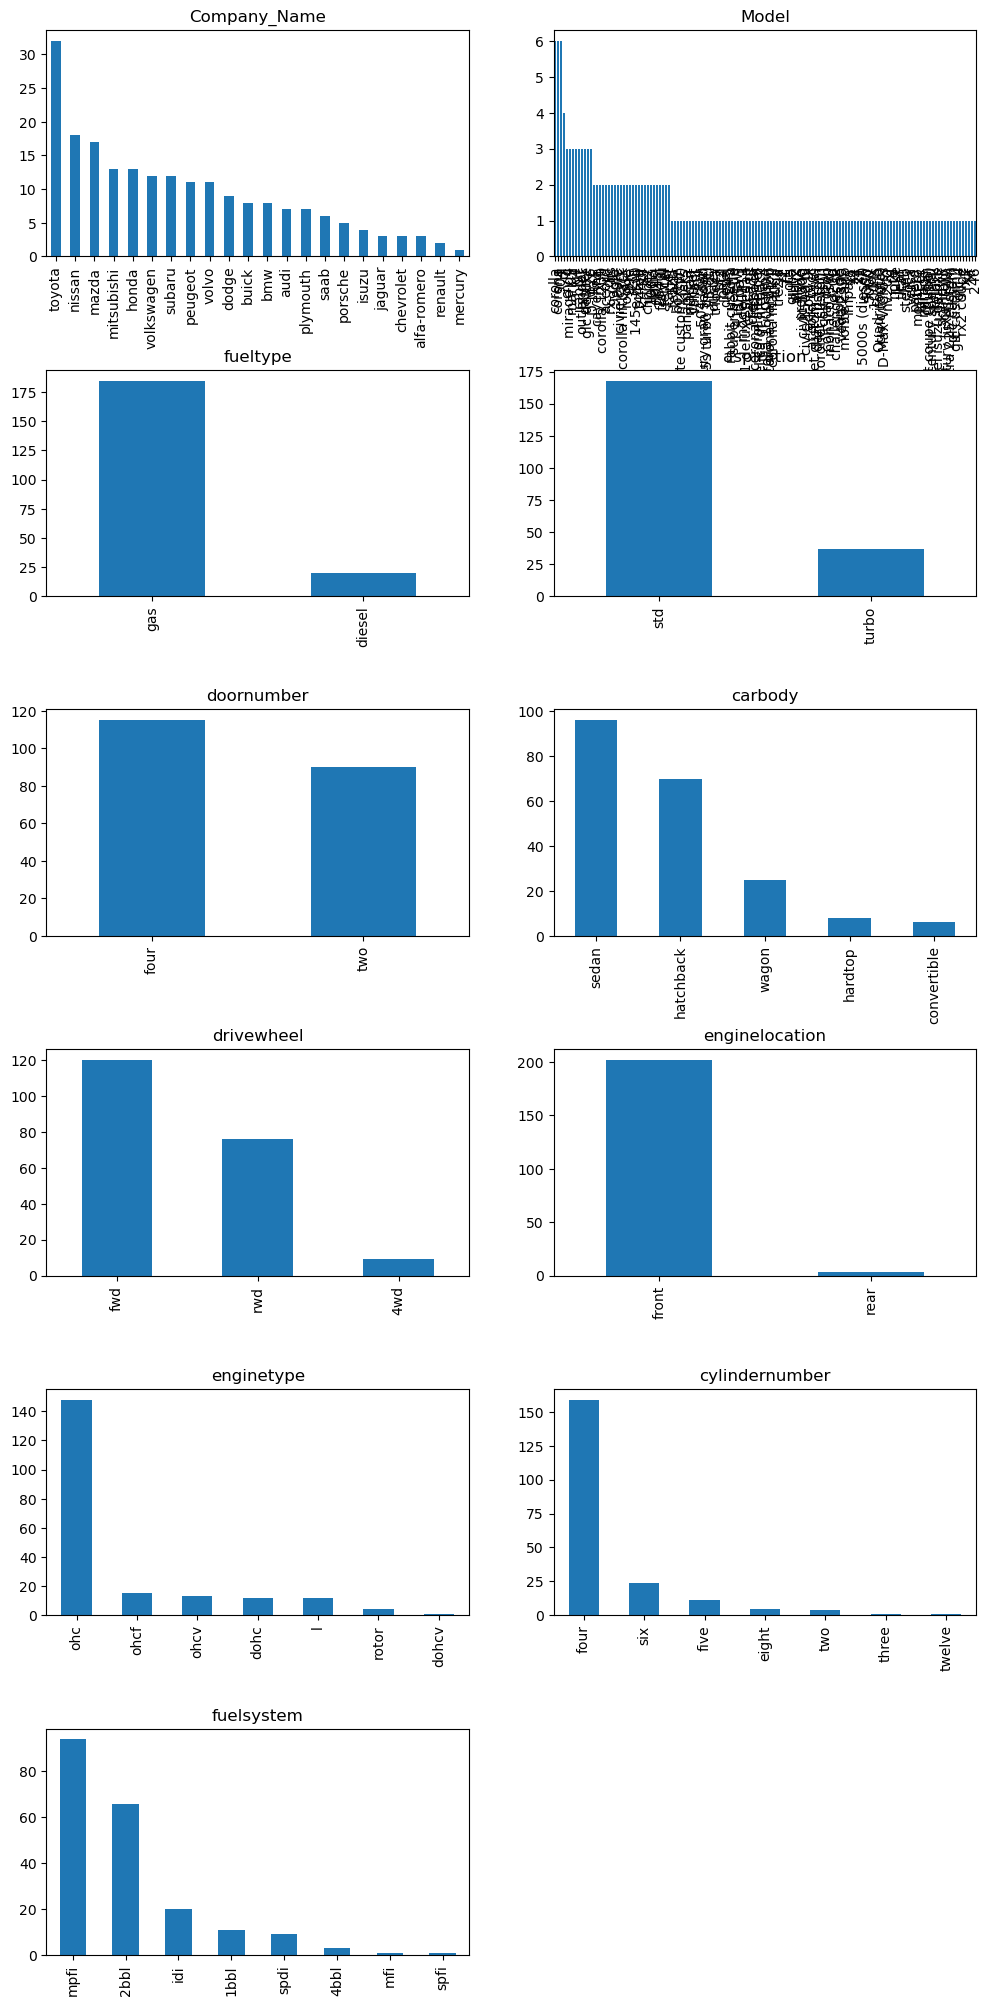

In [66]:
count = 1

plt.figure(figsize=(12,25))
plt.tight_layout()
for i in cars.select_dtypes(include=object):
    plt.subplots_adjust(hspace=0.5)    
    plt.subplot(6,2,count)
    cars[i].value_counts().plot(kind = 'bar')
    plt.title(i)
    count +=1
    
plt.show()

<AxesSubplot:xlabel='doornumber', ylabel='price'>

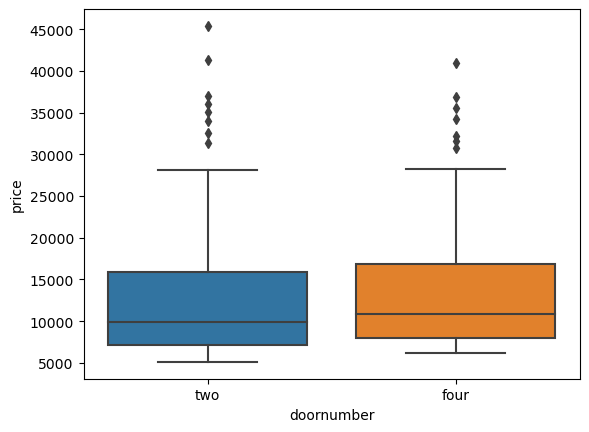

In [67]:
sns.boxplot(x = cars.doornumber, y= cars.price)

In [68]:
#scatter plot

def scatter_plot(x, fig):
    plt.subplot(2,2, fig)
    plt.scatter(cars[x], cars.price)
    plt.title(x+' vs price')
    plt.xlabel(x)
    plt.ylabel('price')    

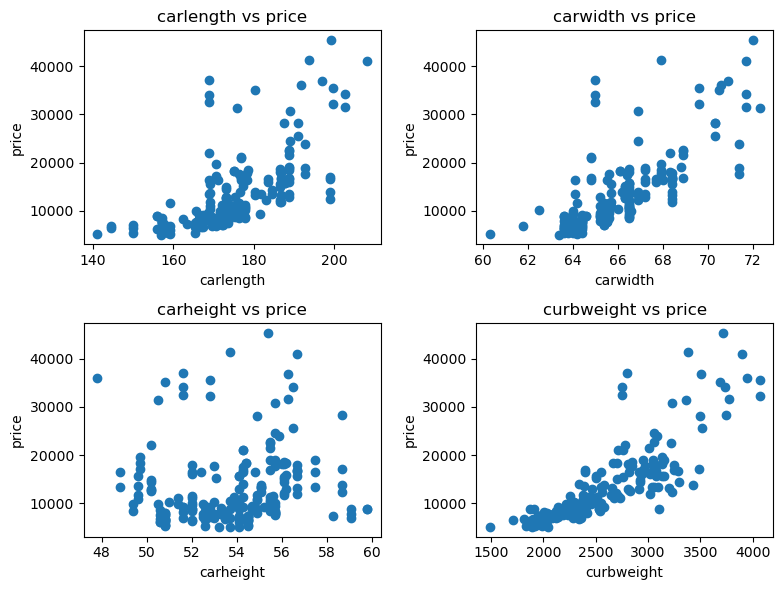

In [69]:
plt.figure(figsize=(8,6))

scatter_plot('carlength', 1)
scatter_plot('carwidth', 2)
scatter_plot('carheight', 3)
scatter_plot('curbweight', 4)

plt.tight_layout()

Inference :
    
1. carwidth, carlength and curbweight seems to have a poitive correlation with price.
2. carheight doesn't show any significant trend with price.

In [70]:
cars.head()

,car_ID,symboling,Company_Name,Model,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


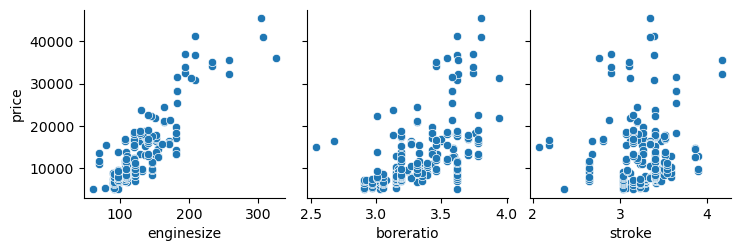

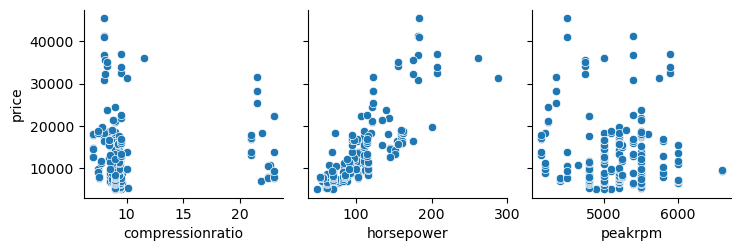

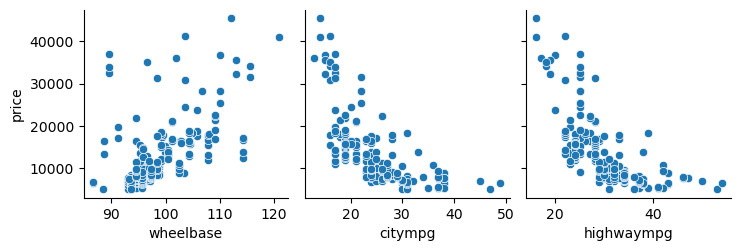

In [71]:
def pair_plot(x, y, z):
    sns.pairplot(cars, x_vars=[x, y, z], y_vars='price', kind = 'scatter')
    plt.show()
    
pair_plot('enginesize', 'boreratio', 'stroke')
pair_plot('compressionratio', 'horsepower', 'peakrpm')
pair_plot('wheelbase', 'citympg', 'highwaympg')

Inference :
1. enginesize, boreratio, horsepower, wheelbase - seem to have a significant positive correlation with price.
2. citympg, highwaympg - seem to have a significant negative correlation with price.

In [72]:
cars.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [73]:
cars.head()

,car_ID,symboling,Company_Name,Model,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [74]:
temp = cars.copy()
table = temp.groupby(['Company_Name'])['price'].mean()
table

Company_Name
alfa-romero    15498.333333
audi           17859.166714
bmw            26118.750000
buick          33647.000000
chevrolet       6007.000000
dodge           7875.444444
honda           8184.692308
isuzu           8916.500000
jaguar         34600.000000
mazda          10652.882353
mercury        16503.000000
mitsubishi      9239.769231
nissan         10415.666667
peugeot        15489.090909
plymouth        7963.428571
porsche        31400.500000
renault         9595.000000
saab           15223.333333
subaru          8541.250000
toyota          9885.812500
volkswagen     10077.500000
volvo          18063.181818
Name: price, dtype: float64

In [75]:
temp = temp.merge(table.reset_index(), how = 'left', on='Company_Name')
temp.head()

,car_ID,symboling,Company_Name,Model,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price_x,price_y
0,1,3,alfa-romero,giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,15498.333333
1,2,3,alfa-romero,stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,15498.333333
2,3,1,alfa-romero,Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,15498.333333
3,4,2,audi,100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,17859.166714
4,5,2,audi,100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,17859.166714


In [76]:
bins = [0, 10000, 20000, 40000]
cars_bin = ['budget car', 'avg_priced car', 'highend car']

In [77]:
cars['car_range'] = pd.cut(temp['price_y'], bins, right = False, labels=cars_bin)
cars.head()

,car_ID,symboling,Company_Name,Model,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_range
0,1,3,alfa-romero,giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,avg_priced car
1,2,3,alfa-romero,stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,avg_priced car
2,3,1,alfa-romero,Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,avg_priced car
3,4,2,audi,100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,avg_priced car
4,5,2,audi,100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,avg_priced car


In [78]:
cars['fuel_economy'] = (0.55*cars['citympg']) + (0.55*cars['highwaympg'])
cars.head()

,car_ID,symboling,Company_Name,Model,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_range,fuel_economy
0,1,3,alfa-romero,giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,avg_priced car,26.40
1,2,3,alfa-romero,stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,avg_priced car,26.40
2,3,1,alfa-romero,Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,avg_priced car,24.75
3,4,2,audi,100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,avg_priced car,29.70
4,5,2,audi,100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,avg_priced car,22.00


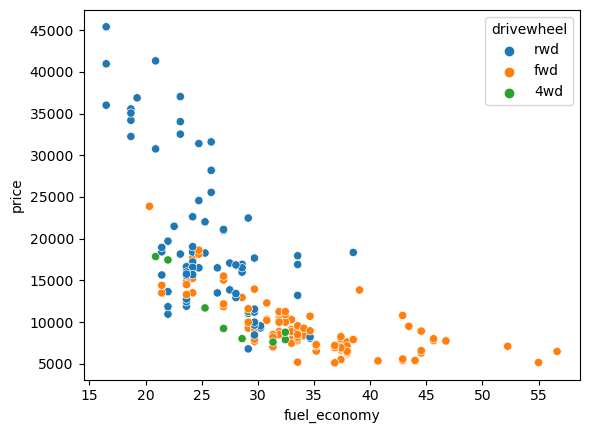

In [79]:
sns.scatterplot(x = cars.fuel_economy, y = cars.price, hue = cars.drivewheel)
plt.show()

In [80]:
cars_categorical = cars.select_dtypes(include=object)
cars_categorical.head()

,Company_Name,Model,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero,giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [81]:
cars_categorical = cars_categorical.drop(['Model'], axis = 1)
cars_categorical.head()

,Company_Name,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [82]:
cars_categorical = pd.get_dummies(cars_categorical, drop_first= True)
cars_categorical.head()

,Company_Name_audi,Company_Name_bmw,Company_Name_buick,Company_Name_chevrolet,Company_Name_dodge,Company_Name_honda,Company_Name_isuzu,Company_Name_jaguar,Company_Name_mazda,Company_Name_mercury,Company_Name_mitsubishi,Company_Name_nissan,Company_Name_peugeot,Company_Name_plymouth,Company_Name_porsche,Company_Name_renault,Company_Name_saab,Company_Name_subaru,Company_Name_toyota,Company_Name_volkswagen,Company_Name_volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [83]:
cars_categorical.shape

(205, 50)

In [84]:
cars_num = cars.select_dtypes(include=['int64', 'float64'])
cars_num.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fuel_economy
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,26.40
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,26.40
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,24.75
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,29.70
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,22.00


In [85]:
cars = pd.concat([cars_num, cars_categorical], axis = 1)
cars.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fuel_economy,Company_Name_audi,Company_Name_bmw,Company_Name_buick,Company_Name_chevrolet,Company_Name_dodge,Company_Name_honda,Company_Name_isuzu,Company_Name_jaguar,Company_Name_mazda,Company_Name_mercury,Company_Name_mitsubishi,Company_Name_nissan,Company_Name_peugeot,Company_Name_plymouth,Company_Name_porsche,Company_Name_renault,Company_Name_saab,Company_Name_subaru,Company_Name_toyota,Company_Name_volkswagen,Company_Name_volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,26.40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,26.40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,24.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,29.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,22.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [86]:
cars = cars.drop(['car_ID', 'symboling'], axis =1)
cars.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fuel_economy,Company_Name_audi,Company_Name_bmw,Company_Name_buick,Company_Name_chevrolet,Company_Name_dodge,Company_Name_honda,Company_Name_isuzu,Company_Name_jaguar,Company_Name_mazda,Company_Name_mercury,Company_Name_mitsubishi,Company_Name_nissan,Company_Name_peugeot,Company_Name_plymouth,Company_Name_porsche,Company_Name_renault,Company_Name_saab,Company_Name_subaru,Company_Name_toyota,Company_Name_volkswagen,Company_Name_volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,26.40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,26.40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,24.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,29.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,22.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [87]:
cars.shape

(205, 65)

In [88]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(cars, train_size=0.7, test_size=0.3, random_state=40)

In [89]:
print(df_train.shape)
print(df_test.shape)

(143, 65)
(62, 65)


In [90]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 
#             'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'fuel_economy']

num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 
            'compressionratio', 'horsepower', 'price', 'fuel_economy']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fuel_economy,Company_Name_audi,Company_Name_bmw,Company_Name_buick,Company_Name_chevrolet,Company_Name_dodge,Company_Name_honda,Company_Name_isuzu,Company_Name_jaguar,Company_Name_mazda,Company_Name_mercury,Company_Name_mitsubishi,Company_Name_nissan,Company_Name_peugeot,Company_Name_plymouth,Company_Name_porsche,Company_Name_renault,Company_Name_saab,Company_Name_subaru,Company_Name_toyota,Company_Name_volkswagen,Company_Name_volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
145,0.303207,0.431496,0.352941,0.575221,0.338717,0.148438,0.857143,0.271429,0.04375,0.280952,4800,24,29,0.150827,0.315068,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
111,0.620991,0.662992,0.647059,0.787611,0.578836,0.195312,0.730159,0.057143,0.08750,0.204762,5000,19,24,0.258301,0.178082,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
86,0.282799,0.437795,0.352941,0.336283,0.294093,0.203125,0.642857,0.661905,0.09375,0.171429,5000,25,32,0.074468,0.369863,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
113,0.804665,0.855118,0.647059,0.787611,0.668083,0.195312,0.730159,0.057143,0.08750,0.204762,5000,19,24,0.286034,0.178082,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
121,0.206997,0.357480,0.196078,0.265487,0.117297,0.078125,0.341270,0.552381,0.15000,0.076190,5500,31,38,0.037234,0.534247,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [91]:
X_train = df_train
y_train = df_train.pop('price')
X_train.shape

(143, 64)

In [92]:
X_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fuel_economy,Company_Name_audi,Company_Name_bmw,Company_Name_buick,Company_Name_chevrolet,Company_Name_dodge,Company_Name_honda,Company_Name_isuzu,Company_Name_jaguar,Company_Name_mazda,Company_Name_mercury,Company_Name_mitsubishi,Company_Name_nissan,Company_Name_peugeot,Company_Name_plymouth,Company_Name_porsche,Company_Name_renault,Company_Name_saab,Company_Name_subaru,Company_Name_toyota,Company_Name_volkswagen,Company_Name_volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
145,0.303207,0.431496,0.352941,0.575221,0.338717,0.148438,0.857143,0.271429,0.04375,0.280952,4800,24,29,0.315068,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
111,0.620991,0.662992,0.647059,0.787611,0.578836,0.195312,0.730159,0.057143,0.08750,0.204762,5000,19,24,0.178082,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
86,0.282799,0.437795,0.352941,0.336283,0.294093,0.203125,0.642857,0.661905,0.09375,0.171429,5000,25,32,0.369863,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
113,0.804665,0.855118,0.647059,0.787611,0.668083,0.195312,0.730159,0.057143,0.08750,0.204762,5000,19,24,0.178082,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
121,0.206997,0.357480,0.196078,0.265487,0.117297,0.078125,0.341270,0.552381,0.15000,0.076190,5500,31,38,0.534247,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [93]:
y_train.head()

145    0.150827
111    0.258301
86     0.074468
113    0.286034
121    0.037234
Name: price, dtype: float64

In [94]:
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 
            'compressionratio', 'horsepower', 'price', 'fuel_economy']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fuel_economy,Company_Name_audi,Company_Name_bmw,Company_Name_buick,Company_Name_chevrolet,Company_Name_dodge,Company_Name_honda,Company_Name_isuzu,Company_Name_jaguar,Company_Name_mazda,Company_Name_mercury,Company_Name_mitsubishi,Company_Name_nissan,Company_Name_peugeot,Company_Name_plymouth,Company_Name_porsche,Company_Name_renault,Company_Name_saab,Company_Name_subaru,Company_Name_toyota,Company_Name_volkswagen,Company_Name_volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
116,0.620991,0.662992,0.647059,0.787611,0.654059,0.320312,0.920635,0.690476,0.87500,0.204762,4150,28,33,0.317249,0.424658,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,0.384840,0.514961,0.441176,0.469027,0.337442,0.257812,0.515873,0.633333,0.09375,0.276190,5500,19,25,0.250093,0.191781,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
89,0.230321,0.325984,0.196078,0.592920,0.074798,0.105469,0.484127,0.580952,0.15000,0.080952,5200,31,37,0.007561,0.520548,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
35,0.288630,0.296063,0.215686,0.592920,0.126222,0.085938,0.293651,0.638095,0.13750,0.114286,6000,30,34,0.052232,0.465753,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
185,0.311953,0.426772,0.362745,0.699115,0.212070,0.152344,0.515873,0.633333,0.12500,0.157143,5250,27,34,0.074618,0.424658,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [95]:
X_test = df_test
y_test = df_test.pop('price')

In [96]:
X_test.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fuel_economy,Company_Name_audi,Company_Name_bmw,Company_Name_buick,Company_Name_chevrolet,Company_Name_dodge,Company_Name_honda,Company_Name_isuzu,Company_Name_jaguar,Company_Name_mazda,Company_Name_mercury,Company_Name_mitsubishi,Company_Name_nissan,Company_Name_peugeot,Company_Name_plymouth,Company_Name_porsche,Company_Name_renault,Company_Name_saab,Company_Name_subaru,Company_Name_toyota,Company_Name_volkswagen,Company_Name_volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
116,0.620991,0.662992,0.647059,0.787611,0.654059,0.320312,0.920635,0.690476,0.87500,0.204762,4150,28,33,0.424658,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,0.384840,0.514961,0.441176,0.469027,0.337442,0.257812,0.515873,0.633333,0.09375,0.276190,5500,19,25,0.191781,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
89,0.230321,0.325984,0.196078,0.592920,0.074798,0.105469,0.484127,0.580952,0.15000,0.080952,5200,31,37,0.520548,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
35,0.288630,0.296063,0.215686,0.592920,0.126222,0.085938,0.293651,0.638095,0.13750,0.114286,6000,30,34,0.465753,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
185,0.311953,0.426772,0.362745,0.699115,0.212070,0.152344,0.515873,0.633333,0.12500,0.157143,5250,27,34,0.424658,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [97]:
y_test.head()

116    0.317249
5      0.250093
89     0.007561
35     0.052232
185    0.074618
Name: price, dtype: float64

In [98]:
print(X_test.shape)
print(y_test.shape)

(62, 64)
(62,)


### model building

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [100]:
X_train.head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fuel_economy,Company_Name_audi,Company_Name_bmw,Company_Name_buick,Company_Name_chevrolet,Company_Name_dodge,Company_Name_honda,Company_Name_isuzu,Company_Name_jaguar,Company_Name_mazda,Company_Name_mercury,Company_Name_mitsubishi,Company_Name_nissan,Company_Name_peugeot,Company_Name_plymouth,Company_Name_porsche,Company_Name_renault,Company_Name_saab,Company_Name_subaru,Company_Name_toyota,Company_Name_volkswagen,Company_Name_volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
145,0.303207,0.431496,0.352941,0.575221,0.338717,0.148438,0.857143,0.271429,0.04375,0.280952,4800,24,29,0.315068,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
111,0.620991,0.662992,0.647059,0.787611,0.578836,0.195312,0.730159,0.057143,0.08750,0.204762,5000,19,24,0.178082,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [101]:
y_train.head(2)

145    0.150827
111    0.258301
Name: price, dtype: float64

In [102]:
X_test.head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fuel_economy,Company_Name_audi,Company_Name_bmw,Company_Name_buick,Company_Name_chevrolet,Company_Name_dodge,Company_Name_honda,Company_Name_isuzu,Company_Name_jaguar,Company_Name_mazda,Company_Name_mercury,Company_Name_mitsubishi,Company_Name_nissan,Company_Name_peugeot,Company_Name_plymouth,Company_Name_porsche,Company_Name_renault,Company_Name_saab,Company_Name_subaru,Company_Name_toyota,Company_Name_volkswagen,Company_Name_volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
116,0.620991,0.662992,0.647059,0.787611,0.654059,0.320312,0.920635,0.690476,0.87500,0.204762,4150,28,33,0.424658,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,0.384840,0.514961,0.441176,0.469027,0.337442,0.257812,0.515873,0.633333,0.09375,0.276190,5500,19,25,0.191781,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [103]:
y_test.head(2)

116    0.317249
5      0.250093
Name: price, dtype: float64

In [104]:
y_train_pred = lm.predict(X_train)
y_test_pred  = lm.predict(X_test)

In [105]:
metric = []

r2_train_lr = r2_score(y_train, y_train_pred)
print('r2_train_lr: ', r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_test_pred)
print('r2_test_lr: ', r2_test_lr)
metric.append(r2_test_lr)

r2_train_lr:  0.9697568031056152
r2_test_lr:  0.7834321337362927


### Ridge Regression

In [106]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [107]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

folds = 5
model_cv = GridSearchCV(estimator= ridge, param_grid=params, scoring='neg_mean_absolute_error', cv = folds,
                       return_train_score= True, verbose = 1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [108]:
model_cv.best_params_

{'alpha': 0.1}

In [109]:
alpha = 0.1

ridge = Ridge(alpha = alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [110]:
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

In [111]:
metrics_ridge = []

r2_score_train_ridge = r2_score(y_train, y_train_pred)
print('r2 train ridge: ', r2_score_train_ridge)
metrics_ridge.append(r2_score_train_ridge)

r2_score_test_ridge = r2_score(y_test, y_test_pred)
print('r2 train ridge: ', r2_score_test_ridge)
metrics_ridge.append(r2_score_test_ridge)

r2 train ridge:  0.9660447858623624
r2 train ridge:  0.8659775174301652


### Lasso Regression

In [112]:
from sklearn.linear_model import Lasso

In [113]:
lasso = Lasso()

model_cv = GridSearchCV(estimator= lasso, param_grid= params, scoring='neg_mean_absolute_error',
                       cv = folds, return_train_score=True, verbose=1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [114]:
model_cv.best_params_

{'alpha': 0.0001}

In [115]:
alpha = 0.0001

lasso = Lasso(alpha = alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [116]:
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

In [117]:
metrics_lasso = []

r2_score_train_lasso = r2_score(y_train, y_train_pred)
print('r2_score_train_lasso: ', r2_score_train_lasso)
metrics_lasso.append(r2_score_train_lasso)

r2_score_test_lasso = r2_score(y_test, y_test_pred)
print('r2_score_test_lasso: ', r2_score_test_lasso)
metrics_lasso.append(r2_score_test_lasso)

r2_score_train_lasso:  0.9651911640813117
r2_score_test_lasso:  0.8009345725540462


In [127]:
# Creating a table which contain all the metrics

table = {'metrics': ['R2 Score (Train)','R2 Score (Test)'], 'linear_reg' : metric,
        'Ridge_reg': metrics_ridge, 'Lasso_reg':metrics_lasso}
metric_table = pd.DataFrame(table)
metric_table.round(2)

,metrics,linear_reg,Ridge_reg,Lasso_reg
0,R2 Score (Train),0.97,0.97,0.97
1,R2 Score (Test),0.78,0.87,0.80


In [120]:
pd.Series(metrics_ridge, name = 'ridge Regression')

0    0.966045
1    0.865978
Name: ridge Regression, dtype: float64